In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from load_data import load_skab
from plot_data import plot_skab

In [25]:
data1, labels1, data2, labels2, data3, labels3 = load_skab()
# plot_skab(data1, labels1)
# plot_skab(data1, labels1, labels1)

In [28]:
train_data = pd.read_csv('datasets/raw/data/anomaly-free/anomaly-free.csv', sep=';')

train_data.index = pd.DatetimeIndex(train_data.datetime)
train_data = train_data.drop(columns=['datetime'])

In [30]:
train_data.shape

(9405, 8)

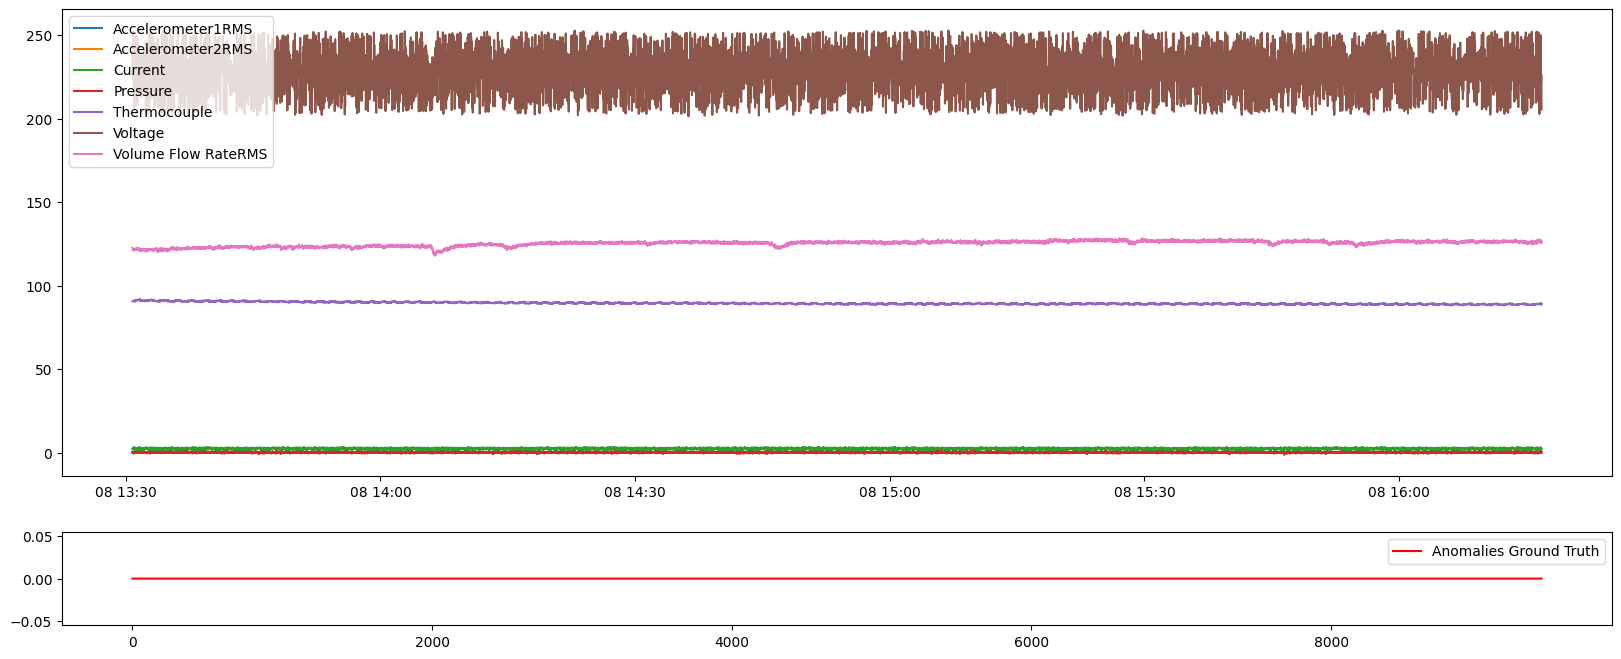

In [31]:
plot_skab(train_data, [0 for x in range(train_data.shape[0])])

# DenseAE

In [33]:
X.shape

(9405, 8)

294/294 [==============================] - 0s 795us/step


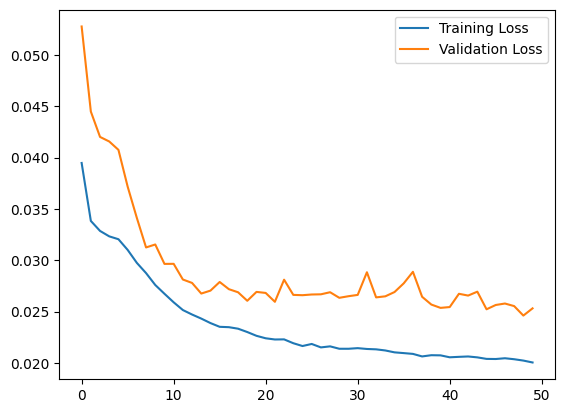

In [36]:
from models.DENSEAE import DenseAE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(train_data)

detector = DenseAE([8, 16, 8, 4, 8, 16, 8], 'relu', 'sigmoid', 0.2, 'rmsprop', 'mse')

detector.train(X)
detector.plot_train_history()

703/703 [==============================] - 1s 783us/step


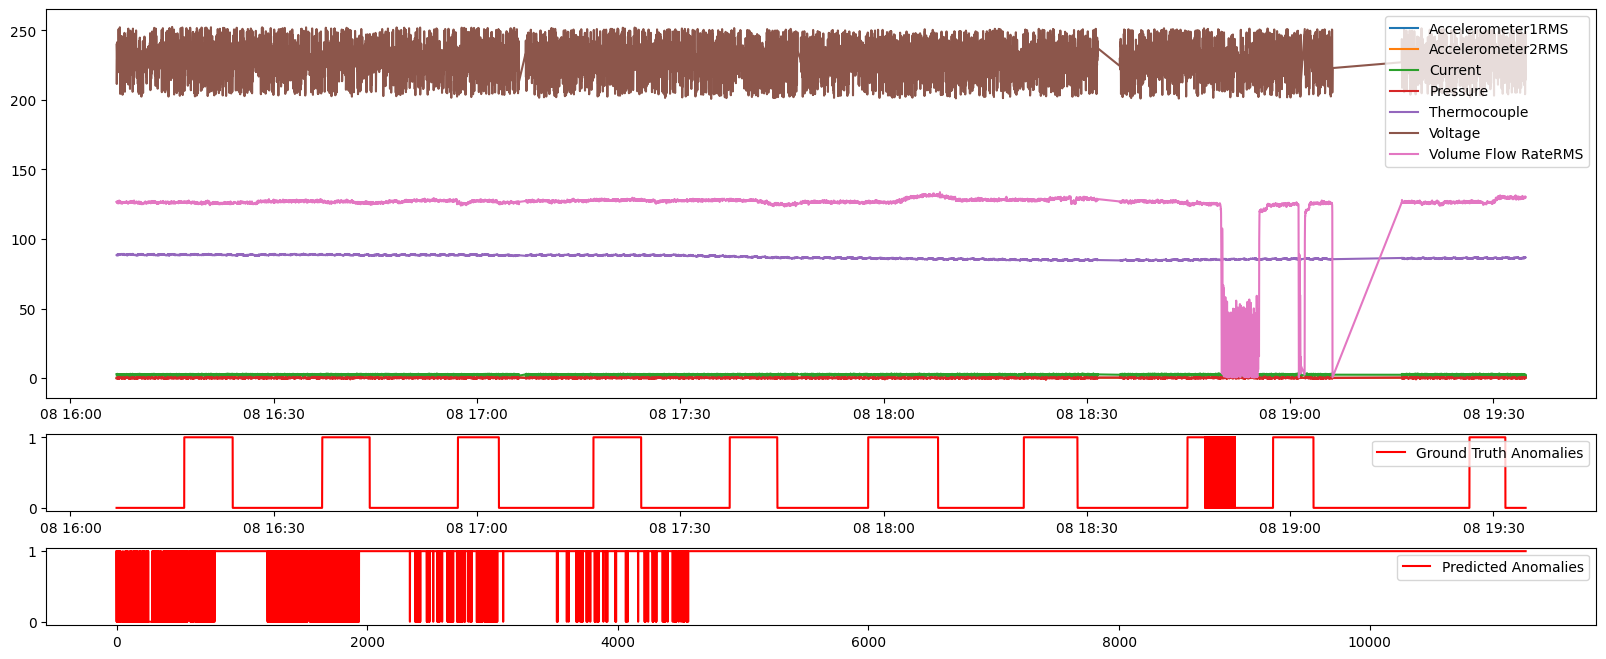

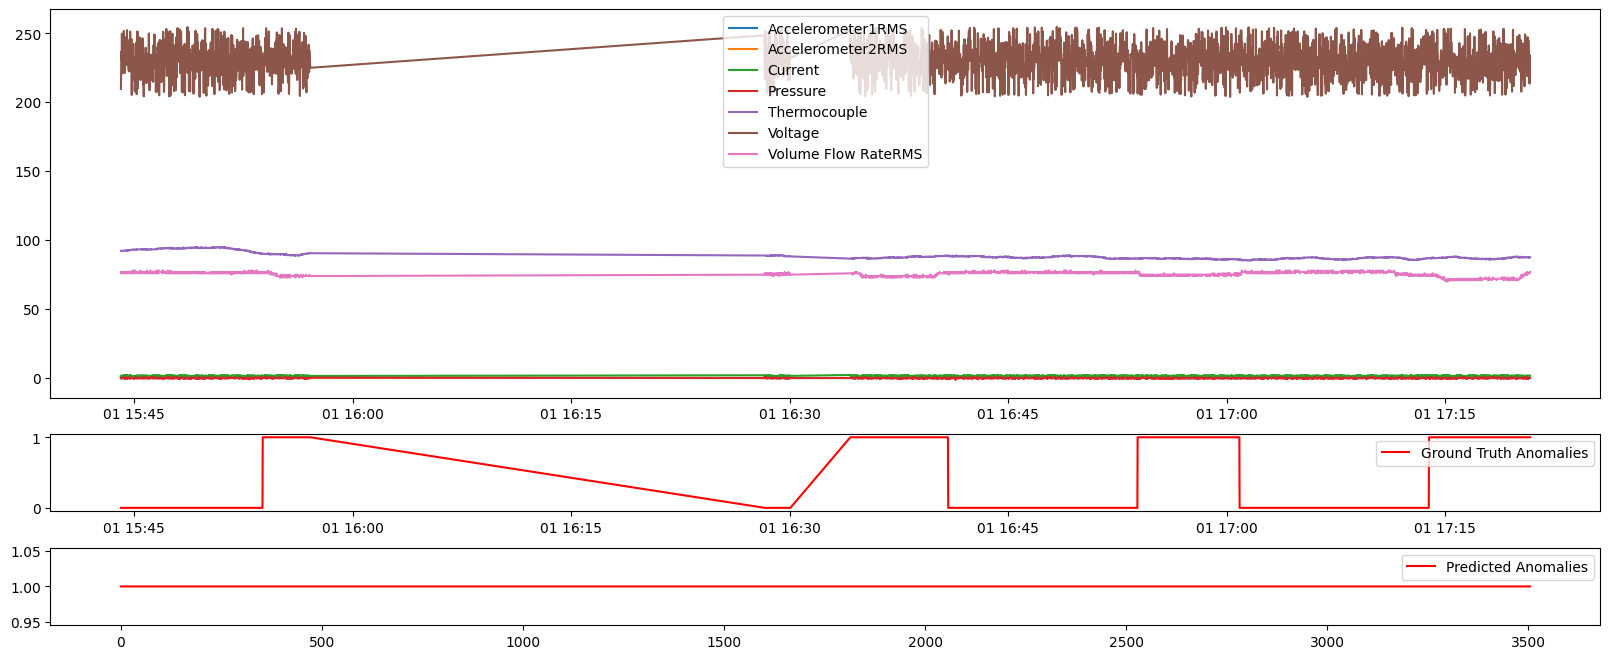

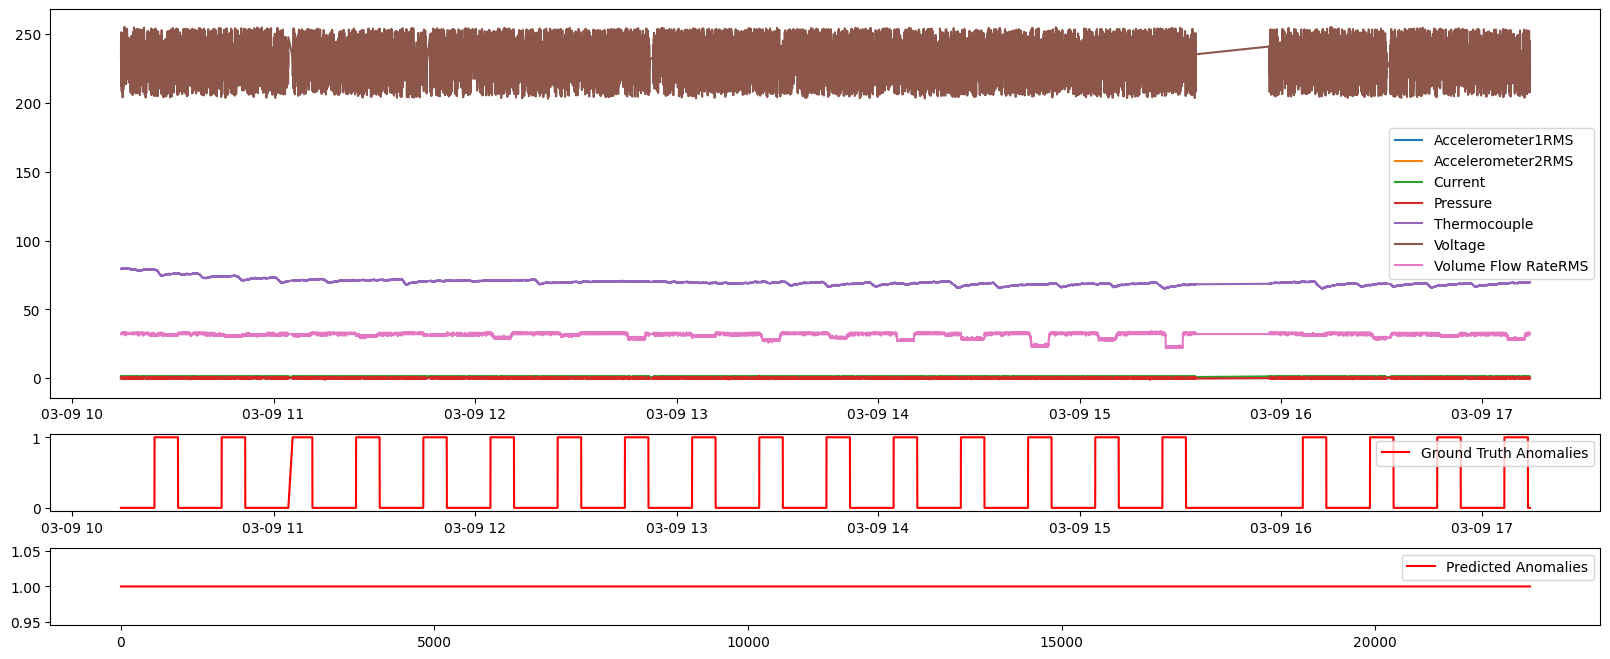

In [37]:
anomalies1 = detector.detect_anomalies(scaler.transform(data1))
anomalies2 = detector.detect_anomalies(scaler.transform(data2))
anomalies3 = detector.detect_anomalies(scaler.transform(data3))

plot_skab(data1, labels1, anomalies1)
plot_skab(data2, labels2, anomalies2)
plot_skab(data3, labels3, anomalies3)

# Hidden Markov Model

In [38]:
from models.HMM import HMM
detector = HMM(n_states=15, n_fits=20, time_step=120, batch_size=120)
detector.train(train_data)

Model #0	Score: 40516.271130377165
Model #1	Score: 37607.45115415206
Model #2	Score: 39234.16841519585
Model #3	Score: 41433.74336889553
Model #4	Score: 42547.67326348127
Model #5	Score: 41594.94467040283
Model #6	Score: 37063.58545359621
Model #7	Score: 38034.3853319807
Model #8	Score: 42913.05961685246
Model #9	Score: 43946.23789166727
Model #10	Score: 42646.61570301536
Model #11	Score: 41843.02336489412
Model #12	Score: 41123.917203911384
Model #13	Score: 40768.44254715031
Model #14	Score: 40407.437206507624
Failure to fit
Model #16	Score: 44005.608128780834
Model #17	Score: 40294.20391362008
Model #18	Score: 39484.06725657275
Model #19	Score: 38212.296637164516


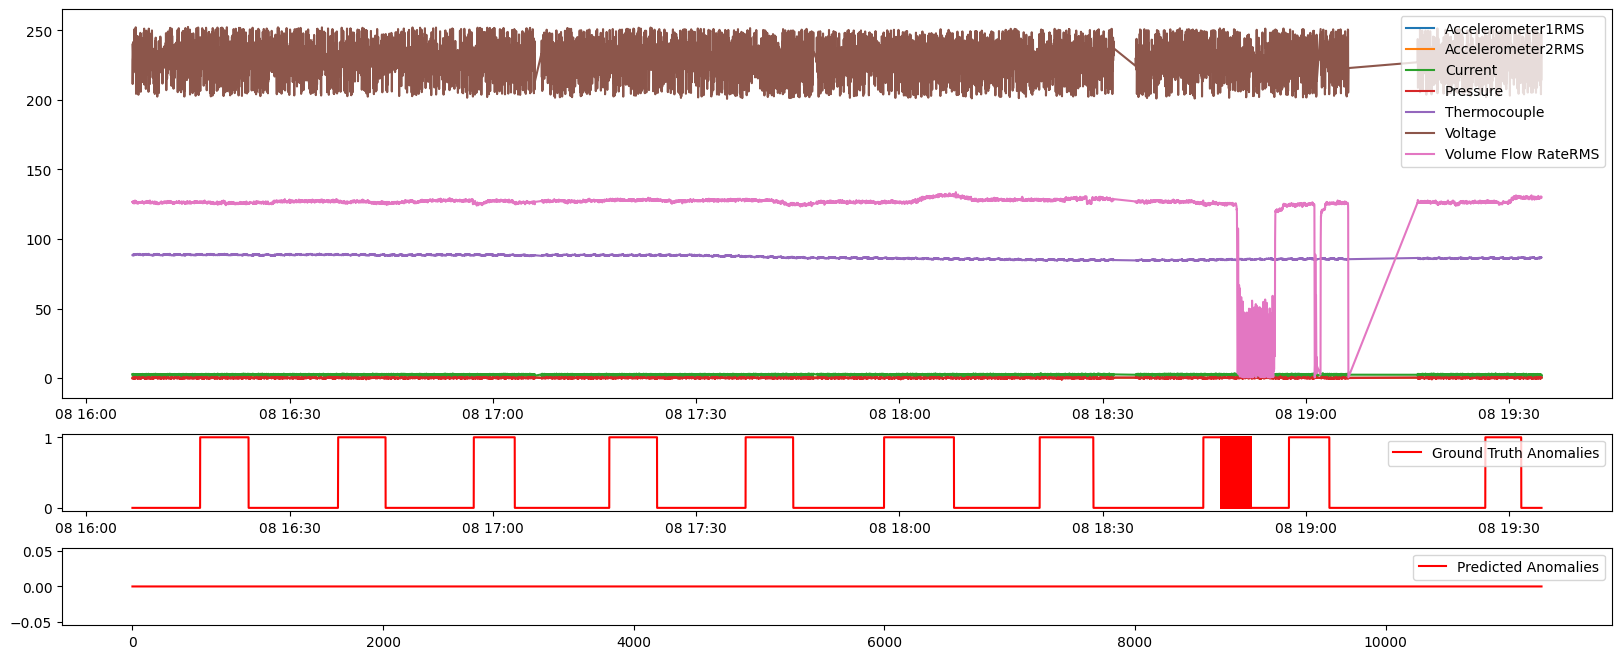

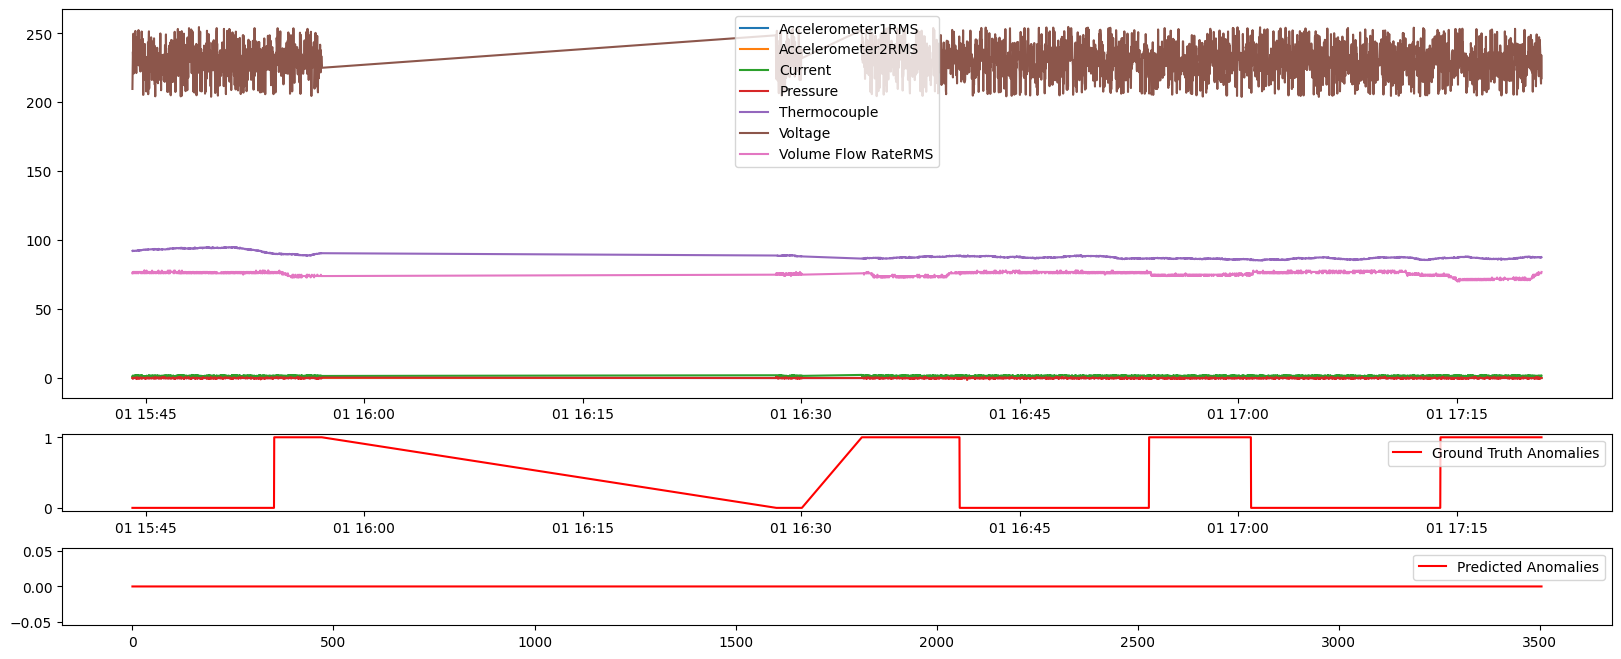

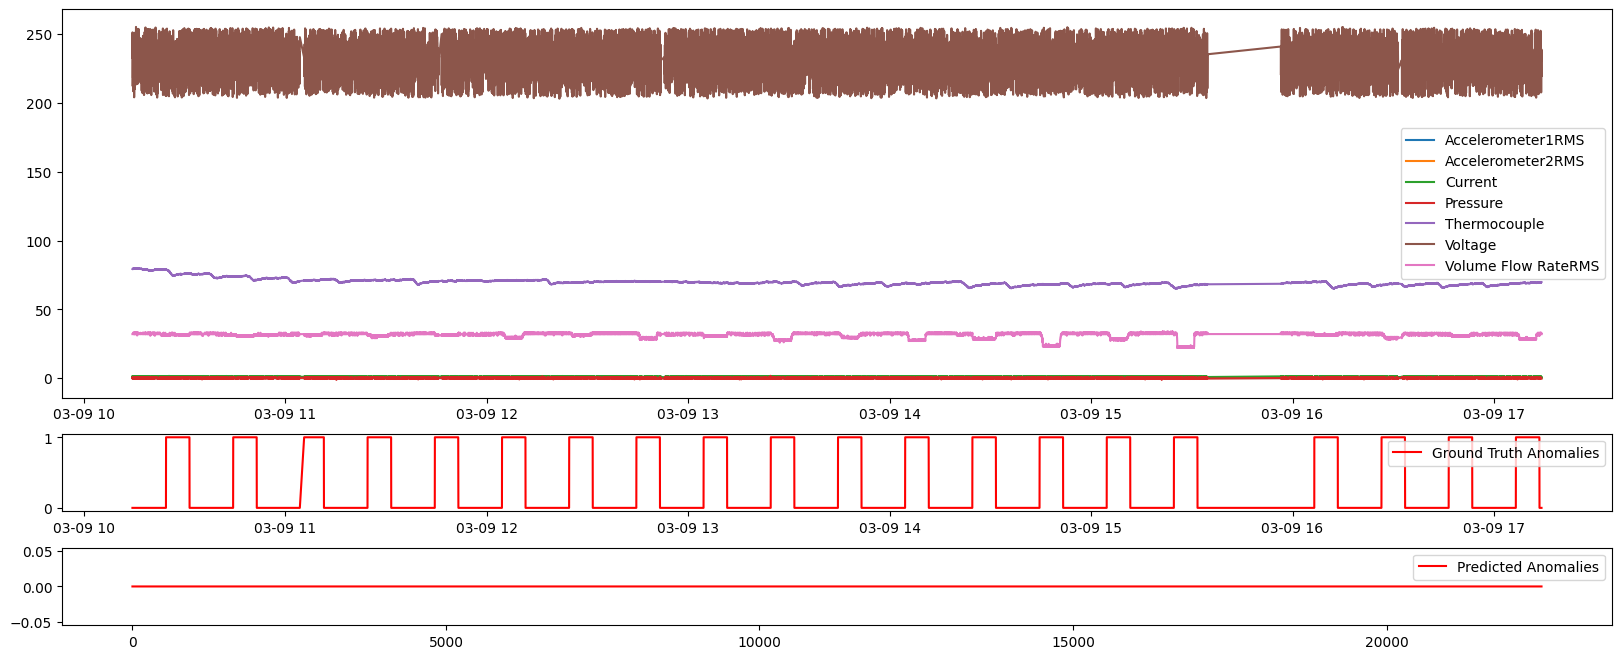

In [39]:
anomalies1 = detector.detect_anomalies(data1)
anomalies2 = detector.detect_anomalies(data2)
anomalies3 = detector.detect_anomalies(data3)

plot_skab(data1, labels1, anomalies1)
plot_skab(data2, labels2, anomalies2)
plot_skab(data3, labels3, anomalies3)

# ConvAE

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d = scaler.fit_transform(train_data)

x = []
time_step = 12
for i in range(0, d.shape[0], time_step):
    x.append(d[i:i+time_step, :])
x = x[0:-1]
X = np.array(x)

In [41]:
X.shape

(783, 12, 8)

25/25 [==============================] - 0s 1ms/step


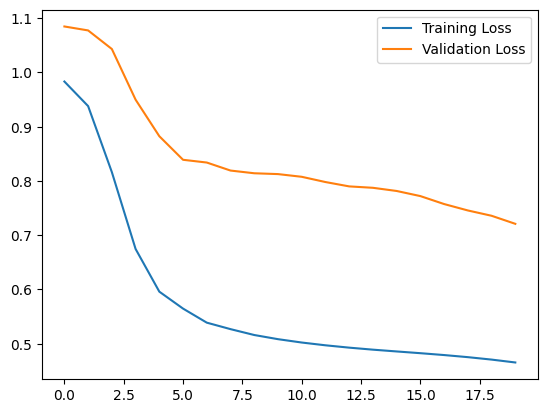

In [44]:
from models.CONVAE import ConvAE

detector = ConvAE(X[0].shape, [(32, 5, 2), (16, 5, 2), (8, 5, 1)], padding='same', activation='relu', optimizer='adam', loss='mae')
detector.train(X, epochs=20)
detector.plot_train_history()

25/25 [==============================] - 0s 1ms/step


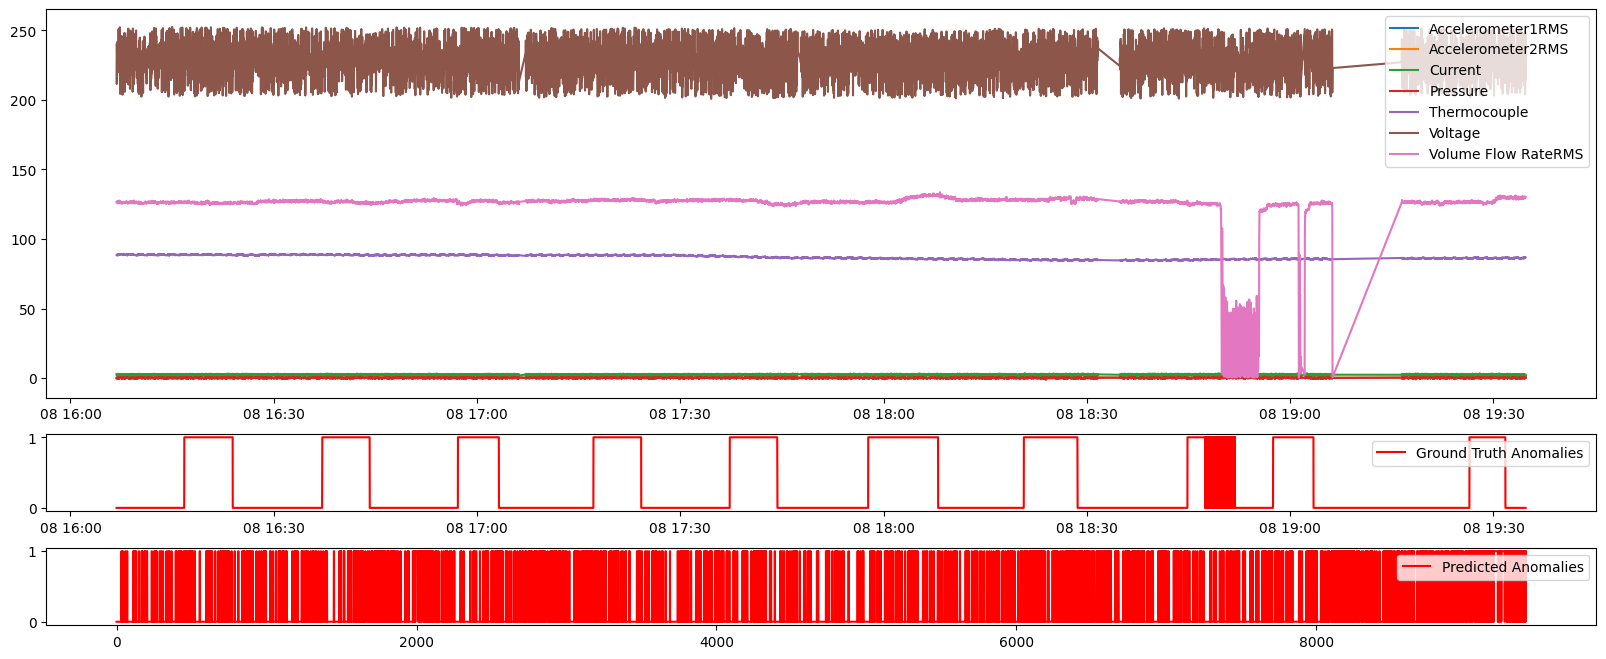

In [47]:
anomalies1 = detector.detect_anomalies(X)

plot_skab(data1, labels1, anomalies1)

# LstmAE